<a href="https://colab.research.google.com/github/Frozen-fire2001/Myrep/blob/main/Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import missingno as msn
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
from datetime import date, timedelta, datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data Cleaning

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/airplane.csv',encoding='Latin-1')
df

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,7/12/1912,6:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,5/20/2009,6:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,5/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,6/1/2009,0:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,6/7/2009,8:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJRÂ,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [ ]:
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [ ]:
df.shape

(5268, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [ ]:
df.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

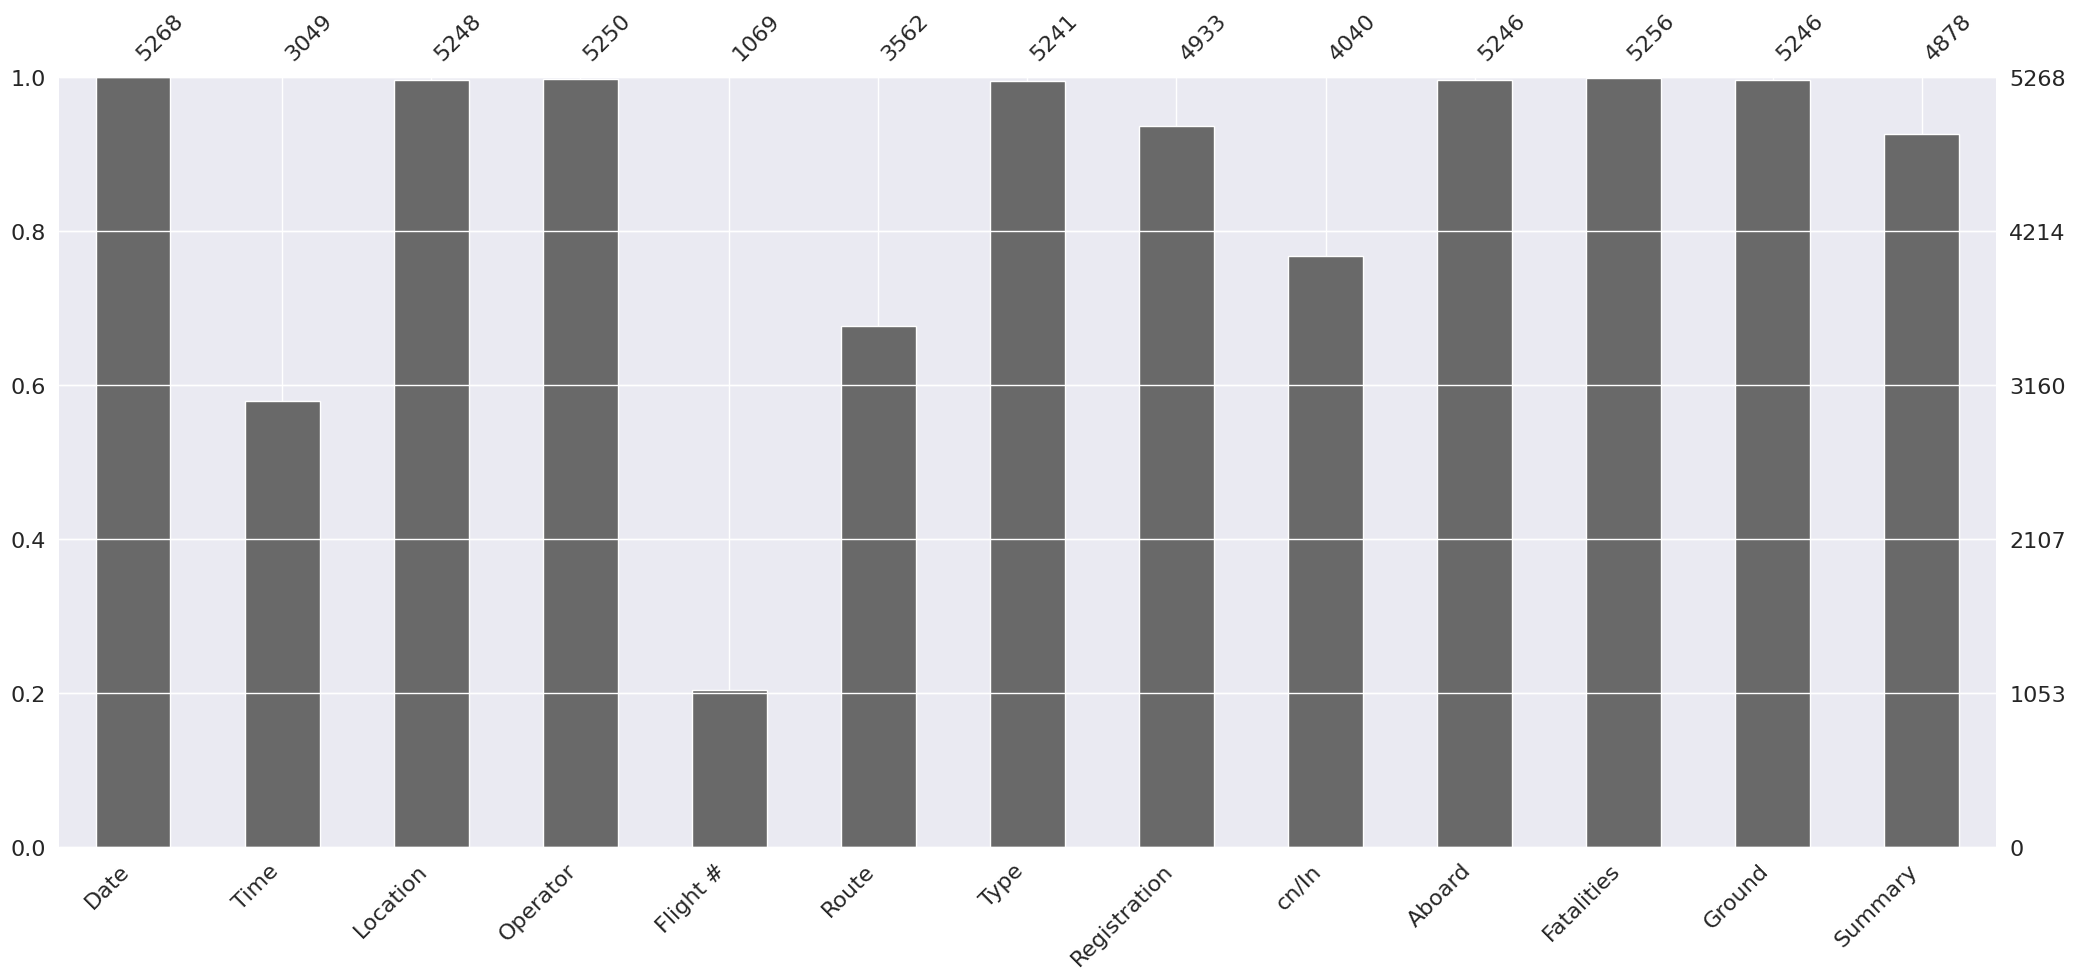

In [ ]:
msn.bar(df)
plt.show()

In [ ]:
df.isnull().sum()/df.shape[0]

Date            0.000000
Time            0.421222
Location        0.003797
Operator        0.003417
Flight #        0.797077
Route           0.323842
Type            0.005125
Registration    0.063591
cn/In           0.233106
Aboard          0.004176
Fatalities      0.002278
Ground          0.004176
Summary         0.074032
dtype: float64

In [ ]:
df.drop(["Flight #", "Registration", "cn/In"], axis=1, inplace=True)

In [ ]:
df.head(10)

,Date,Time,Location,Operator,Route,Type,Aboard,Fatalities,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,7/12/1912,6:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
5,3/5/1915,1:00,"Tienen, Belgium",Military - German Navy,NaN,Zeppelin L-8 (airship),41.0,21.0,0.0,Crashed into trees while attempting to land af...
6,9/3/1915,15:20,"Off Cuxhaven, Germany",Military - German Navy,NaN,Zeppelin L-10 (airship),19.0,19.0,0.0,"Exploded and burned near Neuwerk Island, when..."
7,7/28/1916,NaN,"Near Jambol, Bulgeria",Military - German Army,NaN,Schutte-Lanz S-L-10 (airship),20.0,20.0,0.0,"Crashed near the Black Sea, cause unknown."
8,9/24/1916,1:00,"Billericay, England",Military - German Navy,NaN,Zeppelin L-32 (airship),22.0,22.0,0.0,Shot down by British aircraft crashing in flames.
9,10/1/1916,23:45,"Potters Bar, England",Military - German Navy,NaN,Zeppelin L-31 (airship),19.0,19.0,0.0,Shot down in flames by the British 39th Home D...


In [ ]:
df["Ground"].value_counts()

0.0       5027
1.0         53
2.0         27
3.0         21
4.0         15
5.0         10
8.0         10
7.0          8
11.0         6
6.0          6
22.0         5
13.0         4
24.0         3
10.0         3
44.0         3
20.0         3
14.0         2
2750.0       2
30.0         2
12.0         2
19.0         2
47.0         2
52.0         2
70.0         2
54.0         1
18.0         1
45.0         1
16.0         1
35.0         1
50.0         1
23.0         1
225.0        1
125.0        1
75.0         1
15.0         1
32.0         1
49.0         1
9.0          1
40.0         1
36.0         1
113.0        1
107.0        1
33.0         1
87.0         1
31.0         1
63.0         1
17.0         1
37.0         1
58.0         1
85.0         1
Name: Ground, dtype: int64

In [ ]:
df.nunique()

Date          4753
Time           999
Location      4303
Operator      2476
Route         3244
Type          2446
Aboard         239
Fatalities     191
Ground          50
Summary       4673
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Aboard,5246.0,27.554518,43.076711,0.0,5.0,13.0,30.0,644.0
Fatalities,5256.0,20.068303,33.199952,0.0,3.0,9.0,23.0,583.0
Ground,5246.0,1.608845,53.987827,0.0,0.0,0.0,0.0,2750.0


In [ ]:
df.head(5)

,Date,Time,Location,Operator,Route,Type,Aboard,Fatalities,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,7/12/1912,6:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [ ]:
df['Location'].value_counts()

Sao Paulo, Brazil                    15
Moscow, Russia                       15
Rio de Janeiro, Brazil               14
Anchorage, Alaska                    13
Manila, Philippines                  13
                                     ..
Near Charana, Bolivia                 1
Monte Matto, Italy                    1
Misaki Mountain, Japan                1
Angelholm, Sweden                     1
State of Arunachal Pradesh, India     1
Name: Location, Length: 4303, dtype: int64

In [ ]:
df[(df['Location']=='Sao Paulo, Brazil')][['Location','Summary']]

,Location,Summary
469,"Sao Paulo, Brazil",The mail plane crashed while taking off.
664,"Sao Paulo, Brazil",Crashed in fog.
836,"Sao Paulo, Brazil",Crashed into the Solimoes extension of the Ama...
1148,"Sao Paulo, Brazil",Crashed into a house shortly after taking off ...
1203,"Sao Paulo, Brazil",Crashed while attempting to make an emergency ...
1269,"Sao Paulo, Brazil",Crashed while on final approach to Sao Paulo. ...
1327,"Sao Paulo, Brazil",The cargo plane crashed on takeoff. Elevator l...
1406,"Sao Paulo, Brazil",Crashed on takeoff.
1619,"Sao Paulo, Brazil",Crashed a few minutes after taking off from Sa...
1828,"Sao Paulo, Brazil",The crippled airliner crashed into houses and ...


In [ ]:
df[(df['Fatalities']>20) & (df['Location']=='Sao Paulo, Brazil')]

,Date,Time,Location,Operator,Route,Type,Aboard,Fatalities,Ground,Summary
1406,12/19/1955,NaN,"Sao Paulo, Brazil",Cruzeiro Do Sud,Sao Paulo - Belem,Douglas DC-3,26.0,26.0,0.0,Crashed on takeoff.
1848,5/3/1963,NaN,"Sao Paulo, Brazil",Cruzeiro,Sao Paulo - Rio de Janeiro,Convair CV-340-59,50.0,37.0,0.0,The aircraft returned to airport after the No....
5159,7/17/2007,18:52,"Sao Paulo, Brazil",TAM (Brazil),Porto Alegre - Sao Paulo,Airbus A-320-233,187.0,187.0,12.0,The jet airliner crashed while attempting to l...


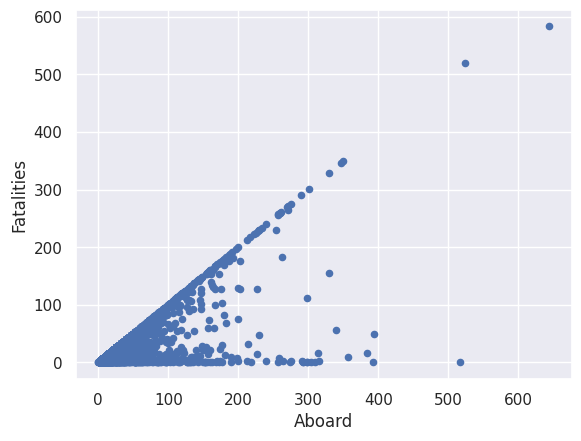

In [ ]:
df.plot(x="Aboard", y="Fatalities", kind="scatter")
plt.show()

In [ ]:
df['Route'].value_counts()


Training                      81
Sightseeing                   29
Test flight                   17
Test                           6
Sao Paulo - Rio de Janeiro     5
                              ..
Manila - Lapu Lapu             1
Saint Denis - Paris            1
Cork - London                  1
Peoria, IL - St. Louis, MO     1
Mechuka for Jorhat             1
Name: Route, Length: 3244, dtype: int64

In [ ]:
df['Time'] = df['Time'].str.replace('c: ', '')
df['Time'] = df['Time'].str.replace('c:', '')
df['Time'] = df['Time'].str.replace('c', '')
df['Time'] = df['Time'].str.replace('12\'20', '12:20')
df['Time'] = df['Time'].str.replace('18.40', '18:40')
df['Time'] = df['Time'].str.replace('0943', '09:43')
df['Time'] = df['Time'].str.replace('22\'08', '22:08')
df['Time'] = df['Time'].str.replace('114:20', '00:00')

In [ ]:
df['Time'] = df['Time'].fillna('00:00')

In [ ]:
df['DateTime'] = df['Date'] + ' ' + df['Time']

In [ ]:
df.head()

,Date,Time,Location,Operator,Route,Type,Aboard,Fatalities,Ground,Summary,DateTime
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",9/17/1908 17:18
1,7/12/1912,6:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,7/12/1912 6:30
2,8/6/1913,00:00,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,8/6/1913 00:00
3,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,9/9/1913 18:30
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,10/17/1913 10:30


#Survivors

In [ ]:
df1=df.T
df['Survivors']=df['Aboard']-df['Fatalities']
df.head()

,Date,Time,Location,Operator,Route,Type,Aboard,Fatalities,Ground,Summary,DateTime,Survivors
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",9/17/1908 17:18,1.0
1,7/12/1912,6:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,7/12/1912 6:30,0.0
2,8/6/1913,00:00,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,8/6/1913 00:00,0.0
3,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,9/9/1913 18:30,6.0
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,10/17/1913 10:30,0.0


#1. a) Yearly how many planes crashed?

In [ ]:
# Convert the Date column to a pandas datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Create a new column for the year
df['Year'] = df['Date'].dt.year

# Group the dataframe by year and count the number of crashes in each year
crashes_per_year = df.groupby('Year').size()

print(crashes_per_year)


Year
1908     1
1912     1
1913     3
1915     2
1916     5
        ..
2005    51
2006    49
2007    54
2008    62
2009    24
Length: 98, dtype: int64


#1. b) How many people were on board?

In [ ]:
 #Calculate the total number of people on board by summing the values in the "Aboard" column
total_on_board = df['Aboard'].sum()

print("The total number of people on board in the dataset is:", total_on_board)

The total number of people on board in the dataset is: 144551.0


#1. c) How many survived?

In [ ]:
# Calculate the total number of survivors by summing the values in the "Aboard" column where "Survived" is 1
Survived = df['Aboard'].sum() - df['Fatalities'].sum()
total_survivors = df['Survivors'].sum()

print("The total number of survivors in the dataset is:", total_survivors)


The total number of survivors in the dataset is: 39193.0


#1. d)  How many died?


In [ ]:

# Calculate the total number of fatalities by summing the values in the "Aboard" column and subtracting the values in the "Survived" column
total_fatalities = df['Aboard'].sum() - df['Survivors'].sum()

print("The total number of fatalities in the dataset is:", total_fatalities)

The total number of fatalities in the dataset is: 105358.0


#1)Yearly how many planes crashed? how many people were on board? how many survived? how many died?

In [ ]:

# Convert the date column to a datetime type
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Group the data by year and calculate the number of crashes, number of people on board,
# number of survivors, and number of fatalities for each year
yearly_data = df.groupby(df['Date'].dt.year).agg({'Date': 'count', 'Aboard': 'sum',
                                                   'Fatalities': 'sum', 'Ground': 'sum',
                                                   'Survivors': 'sum'})

# Rename the columns to make them more descriptive
yearly_data = yearly_data.rename(columns={'Date': 'Crashes', 'Aboard': 'Total on Board',
                                          'Survivors': 'Total Survivors',
                                          'Fatalities': 'Total Fatalities', 'Ground': 'Total Ground Fatalities'})

# Print the resulting DataFrame
print(yearly_data)


      Crashes  Total on Board  Total Fatalities  Total Ground Fatalities  \
Date                                                                       
1908        1             2.0               1.0                      0.0   
1912        1             5.0               5.0                      0.0   
1913        3            51.0              45.0                      0.0   
1915        2            60.0              40.0                      0.0   
1916        5           109.0             108.0                      0.0   
...       ...             ...               ...                      ...   
2005       51          2164.0            1306.0                     59.0   
2006       49          1413.0            1136.0                      4.0   
2007       54          1364.0             931.0                     57.0   
2008       62          1463.0             820.0                     60.0   
2009       24           891.0             581.0                      3.0   

      Total

#2. Highest number of crashes by operator and Type of aircrafts.

In [ ]:
# Group the dataframe by operator and count the number of crashes for each operator
crashes_by_operator = df.groupby('Operator').size()

# Find the operator with the highest number of crashes
operator_with_most_crashes = crashes_by_operator.idxmax()
num_crashes_by_operator = crashes_by_operator.max()

# Group the dataframe by type of aircraft and count the number of crashes for each type of aircraft
crashes_by_type = df.groupby('Type').size()

# Find the aircraft type with the highest number of crashes
type_with_most_crashes = crashes_by_type.idxmax()
num_crashes_by_type = crashes_by_type.max()

print("The operator with the highest number of crashes is", operator_with_most_crashes, "with", num_crashes_by_operator, "crashes.")
print("The aircraft type with the highest number of crashes is", type_with_most_crashes, "with", num_crashes_by_type, "crashes.")


The operator with the highest number of crashes is Aeroflot with 179 crashes.
The aircraft type with the highest number of crashes is Douglas DC-3 with 334 crashes.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5268 non-null   datetime64[ns]
 1   Time        5268 non-null   object        
 2   Location    5248 non-null   object        
 3   Operator    5250 non-null   object        
 4   Route       3562 non-null   object        
 5   Type        5241 non-null   object        
 6   Aboard      5246 non-null   float64       
 7   Fatalities  5256 non-null   float64       
 8   Ground      5246 non-null   float64       
 9   Summary     4878 non-null   object        
 10  DateTime    5268 non-null   object        
 11  Year        5268 non-null   int64         
 12  Survivors   5246 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 535.2+ KB


#3. ‘Summary’ field has the details about the crashes. Find the reasons of the crash and categorize them in different clusters i.e Fire, shot down, weather (for the ‘Blanks’ in the data category can be UNKNOWN) you are open to make clusters of your choice but they should not exceed 7.

In [ ]:
def clean_text(Summary):
  Summary=Summary.lower()
  return Summary

In [ ]:
df['Summary'].fillna('', inplace=True)
df['Summary'].apply(clean_text)

NameError: ignored

In [ ]:
# Create a dictionary to map the reasons of the crashes to their corresponding clusters
reasons_dict = {
    'Fire': ['fire', 'burned', 'burnt', 'explosion', 'inflamed', 'ignited'],
    'Shot down': ['shot down', 'missile', 'attack', 'strafed', 'combat', 'intercepted', 'bombed'],
    'Weather': ['storm', 'thunder', 'lightning', 'hurricane', 'wind', 'turbulence', 'icing', 'fog', 'snow', 'blizzard', 'rain', 'cloud'],
    'Mechanical failure': ['failure', 'malfunction', 'breakdown', 'collapse', 'disintegrated', 'ruptured', 'separated', 'cracked', 'structural'],
    'Pilot error': ['pilot error', 'error', 'mistake', 'miscommunication', 'overshoot', 'overspeed', 'overload', 'overturn', 'overran', 'stall', 'spinning'],
    'Other human error': ['human error', 'crew error', 'ground error', 'communication', 'navigation', 'traffic', 'maintenance'],
    'Unknown': ['unknown', 'unidentified', 'undetermined', 'blank', 'lost']
}

# Categorize the reasons of the crashes into clusters
clusters_dict = {cluster: [] for cluster in reasons_dict}

for summary in df['Summary']:
    summary = summary.lower()
    categorized = False
    for cluster, reasons in reasons_dict.items():
        for reason in reasons:
            if reason in summary:
                clusters_dict[cluster].append(summary)
                categorized = True
                break
        if categorized:
            break
    if not categorized:
        clusters_dict['Unknown'].append(summary)


# Print the number of incidents in each cluster
for cluster, incidents in clusters_dict.items():
    print(f"{cluster}: {len(incidents)}")



In [ ]:
# Create a function to categorize the reasons of the crashes into clusters
def categorize(summary):
    summary = summary.lower()
    for cluster, reasons in reasons_dict.items():
        for reason in reasons:
            if reason in summary:
                return cluster
    return 'Unknown'

# Add a new column to the DataFrame that contains the cluster for each row
df['Cluster'] = df['Summary'].apply(categorize)

# Show the first 10 rows of the DataFrame with the new 'Cluster' column

df.head(10)

In [ ]:


# Create a dictionary to map the reasons of the crashes to their corresponding clusters
reasons_dict = {
    'Fire': ['fire', 'burned', 'burnt', 'explosion', 'inflamed', 'ignited'],
    'Shot down': ['shot down', 'missile', 'attack', 'strafed', 'combat', 'intercepted', 'bombed'],
    'Weather': ['storm', 'thunder', 'lightning', 'hurricane', 'wind', 'turbulence', 'icing', 'fog', 'snow', 'blizzard', 'rain', 'cloud'],
    'Mechanical failure': ['failure', 'malfunction', 'breakdown', 'collapse', 'disintegrated', 'ruptured', 'separated', 'cracked', 'structural'],
    'Pilot error': ['pilot error', 'error', 'mistake', 'miscommunication', 'overshoot', 'overspeed', 'overload', 'overturn', 'overran', 'stall', 'spinning'],
    'Other human error': ['human error', 'crew error', 'ground error', 'communication', 'navigation', 'traffic', 'maintenance'],
    'Unknown': ['unknown', 'unidentified', 'undetermined', 'blank', 'lost']
}

# Categorize the reasons of the crashes into clusters
clusters_dict = {cluster: 0 for cluster in reasons_dict}

for summary in df['Summary']:
    summary = summary.lower()
    categorized = False
    for cluster, reasons in reasons_dict.items():
        for reason in reasons:
            if reason in summary:
                clusters_dict[cluster] += 1
                categorized = True
                break
        if categorized:
            break
    if not categorized:
        clusters_dict['Unknown'] += 1

# Create a bar chart of the number of incidents in each cluster
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(clusters_dict.keys(), clusters_dict.values())
ax.set_title('Number of Incidents by Cluster')
ax.set_xlabel('Cluster')
ax.set_ylabel('Number of Incidents')

plt.show()


In [ ]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['category']= label_encoder.fit_transform(df['Cluster'])

df['category'].unique()

In [ ]:
df.head()

#Finding Best fit models
#Dataset to predict whether a crash resulted in fatalities or not:

#Logistic regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# preprocess the data
# select relevant features
features = ['Operator', 'Type', 'Route', 'Location', 'category', 'Year']
X = df[features]
# convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=['Operator', 'Type', 'Route', 'Location'], drop_first=True)
# remove missing values
X.dropna(inplace=True)
# select the target variable
y = df.loc[X.index]['Fatalities']
# binarize the target variable
y = (y > 0).astype(int)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit a logistic regression model
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9876660341555977


#Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# preprocess the data
# select relevant features
features = ['Operator', 'Type', 'Route', 'Location', 'category', 'Year']
X = df[features]
# convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=['Operator', 'Type', 'Route', 'Location'], drop_first=True)
# remove missing values
X.dropna(inplace=True)
# select the target variable
y = df.loc[X.index]['Fatalities']
# binarize the target variable
y = (y > 0).astype(int)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit a random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9857685009487666


#Gradient Boosting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
features = ['Operator', 'Type', 'Route', 'Location', 'category', 'Year']
X = df[features]
# convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=['Operator', 'Type', 'Route', 'Location'], drop_first=True)
# remove missing values
X.dropna(inplace=True)
# select the target variable
y = df.loc[X.index]['Fatalities']
# binarize the target variable
y = (y > 0).astype(int)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit a gradient boosting classifier
model = GradientBoostingClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9810246679316889


#Support Vector Machines (SVMs)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
# select relevant features
features = ['Operator', 'Type', 'Route', 'Location', 'category', 'Year']
X = df[features]
# convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=['Operator', 'Type', 'Route', 'Location'], drop_first=True)
# remove missing values
X.dropna(inplace=True)
# select the target variable
y = df.loc[X.index]['Fatalities']
# binarize the target variable
y = (y > 0).astype(int)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit an SVM classifier
model = SVC(kernel='linear', C=1.0, random_state=0)
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9838709677419355


#Neural Networks

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
features = ['Operator', 'Type', 'Route', 'Location', 'category', 'Year']
X = df[features]
# convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=['Operator', 'Type', 'Route', 'Location'], drop_first=True)
# remove missing values
X.dropna(inplace=True)
# select the target variable
y = df.loc[X.index]['Fatalities']
# binarize the target variable
y = (y > 0).astype(int)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# create a neural network classifier
model = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu', solver='adam', max_iter=1000, random_state=0)

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9876660341555977


#4. Find the number of crashed aircrafts and number of deaths against each category from above step.

In [ ]:
# Group the dataframe by category and count the number of crashes and deaths for each category
crashes_and_deaths_by_category = df.groupby('category')[['Aboard', 'Fatalities']].sum()
print(crashes_and_deaths_by_category)

           Aboard  Fatalities
category                     
0         23640.0     16577.0
1         16806.0     12417.0
2          1109.0       903.0
3         12575.0      8881.0
4          4468.0      3918.0
5         49837.0     36106.0
6         36116.0     26677.0


In [ ]:
# Group the DataFrame by the 'Cluster' column and calculate the number of incidents, number of deaths, and number of survivors for each cluster
grouped = df.groupby('Cluster').agg({'Date': 'count', 'Fatalities': 'sum', 'Aboard': 'sum', 'Ground': 'sum'})

# Rename the columns to more meaningful names
grouped = grouped.rename(columns={'Date': 'Incidents', 'Fatalities': 'Deaths', 'Aboard': 'Total Aboard', 'Ground': 'Total Ground'})

# Show the grouped DataFrame
print(grouped)

                    Incidents   Deaths  Total Aboard  Total Ground
Cluster                                                           
Fire                      567  16577.0       23640.0         316.0
Mechanical failure        501  12417.0       16806.0        5921.0
Other human error          37    903.0        1109.0          19.0
Pilot error               343   8881.0       12575.0         475.0
Shot down                 129   3918.0        4468.0           3.0
Unknown                  2425  36106.0       49837.0        1053.0
Weather                  1266  26677.0       36116.0         653.0


#The number of airplane crashes has been decreasing over time. The number of crashes per year peaked in the 1970s and has been declining ever since

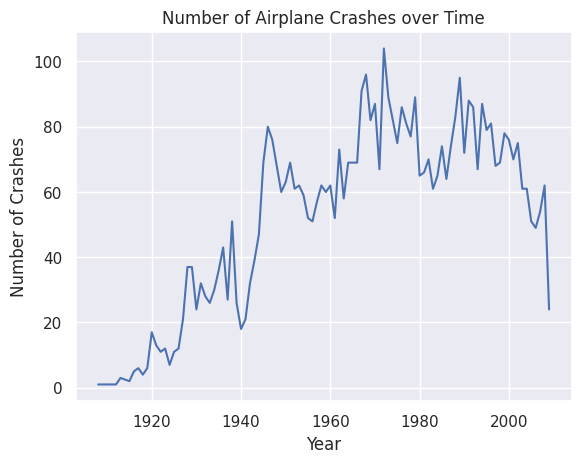

In [ ]:
# Convert the date column to a datetime object and extract the year
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# Count the number of crashes per year and plot the results
crashes_per_year = df.groupby('Year')['Date'].count()
plt.plot(crashes_per_year)

# Add labels and title to the plot
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.title('Number of Airplane Crashes over Time')

# Show the plot
plt.show()

#The number of fatalities per crash has decreased over time, indicating that airplanes are becoming safer and more advanced in terms of technology and safety features.

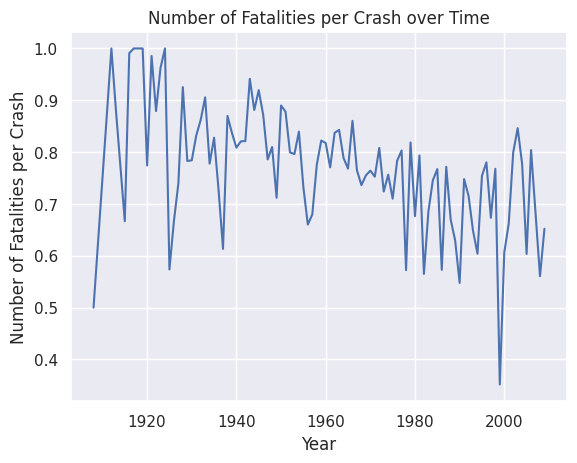

In [ ]:
# Convert the date column to a datetime object and extract the year
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# Calculate the number of fatalities per crash for each year
fatalities_per_crash = df.groupby('Year').apply(lambda x: x['Fatalities'].sum() / x['Aboard'].sum())

# Plot the results
plt.plot(fatalities_per_crash)

# Add labels and title to the plot
plt.xlabel('Year')
plt.ylabel('Number of Fatalities per Crash')
plt.title('Number of Fatalities per Crash over Time')

# Show the plot
plt.show()
